<a href="https://colab.research.google.com/github/RodrigoTenorio86/Machine-Learning-2-Redes-Neurais-e-Deep-Learning-/blob/master/Analise_linear_Beer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Processo de Modelagem

In [0]:
import numpy as np
import pandas as pd
# Analise Graficas

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn')

In [3]:
cerveja = pd.read_excel("/content/beer_consumption.xlsx")
cerveja.head()

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
0,2015-01-01,27.30,23.9,32.5,0.0,False,25461
1,2015-01-02,27.02,24.5,33.5,0.0,False,28972
2,2015-01-03,24.82,22.4,29.9,0.0,True,30814
3,2015-01-04,23.98,21.5,28.6,1.2,True,29799
4,2015-01-05,23.82,21.0,28.3,0.0,False,28900


In [4]:
cerveja.describe()

,temp_avg,temp_min,temp_max,precip,beer_consumption
count,361.000000,363.000000,362.000000,365.000000,365.000000
mean,21.101385,17.396970,26.480663,5.196712,25401.367123
std,3.546618,2.969405,4.758531,12.417844,4399.142703
min,0.000000,0.000000,0.000000,0.000000,14343.000000
25%,18.920000,15.200000,23.725000,0.000000,22008.000000
50%,21.360000,17.900000,26.900000,0.000000,24867.000000
75%,23.280000,19.550000,29.400000,3.200000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,37937.000000


In [5]:
cerveja.count()

data                365
temp_avg            361
temp_min            363
temp_max            362
precip              365
weekend             363
beer_consumption    365
dtype: int64

In [0]:
cerveja.corr()

,temp_avg,temp_min,temp_max,precip,beer_consumption
temp_avg,1.000000,0.678633,0.735339,0.026834,0.503227
temp_min,0.678633,1.000000,0.531704,0.094701,0.345033
temp_max,0.735339,0.531704,1.000000,-0.071084,0.587027
precip,0.026834,0.094701,-0.071084,1.000000,-0.193784
beer_consumption,0.503227,0.345033,0.587027,-0.193784,1.000000


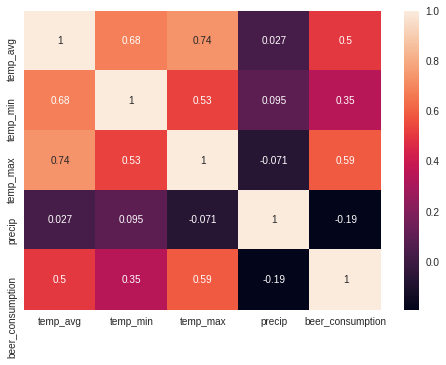

In [0]:
sns.heatmap(cerveja.corr(),annot= True)

In [0]:
# Compreende As relaçoes entre variaveis

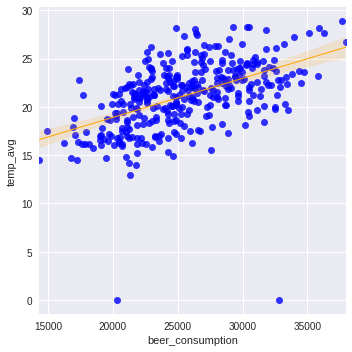

In [0]:
sns.lmplot("beer_consumption", "temp_avg", cerveja,
           scatter_kws={"marker":"x","color":"blue"},
           line_kws={"linewidth":1, "color":"orange"})


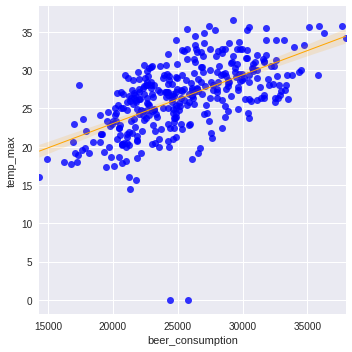

In [0]:
sns.lmplot("beer_consumption", "temp_max", cerveja,
           scatter_kws={"marker":"x","color":"blue"},
           line_kws={"linewidth":1, "color":"orange"})


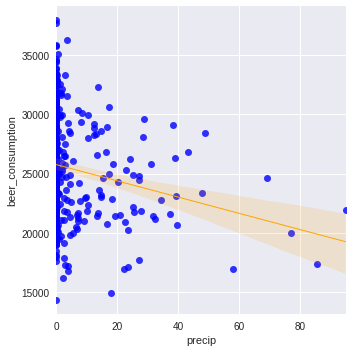

In [0]:
sns.lmplot("precip", "beer_consumption", cerveja,
           scatter_kws={"marker":"x","color":"blue"},
           line_kws={"linewidth":1, "color":"orange"})


In [0]:
cerveja.head()

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
0,2015-01-01,27.30,23.9,32.5,0.0,False,25461
1,2015-01-02,27.02,24.5,33.5,0.0,False,28972
2,2015-01-03,24.82,22.4,29.9,0.0,True,30814
3,2015-01-04,23.98,21.5,28.6,1.2,True,29799
4,2015-01-05,23.82,21.0,28.3,0.0,False,28900


In [0]:
# Mapear dados rotulos e transformar em numericos variavel 

In [0]:
class_weekend={True:1, False:0}

cerveja["weekend"]=cerveja["weekend"].map(class_weekend)

In [7]:
cerveja.head()

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28900


In [0]:
# Busca por dados nulos e invalidos

In [9]:
cerveja.isnull().any()

data                False
temp_avg             True
temp_min             True
temp_max             True
precip              False
weekend              True
beer_consumption    False
dtype: bool

In [8]:
cerveja[cerveja["temp_avg"].isnull()]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
168,2015-06-18,NaN,15.8,26.2,0.0,0.0,24534
181,2015-07-01,NaN,16.2,20.5,0.0,0.0,20824
309,2015-11-06,NaN,18.0,22.8,0.0,0.0,20575
314,2015-11-11,NaN,19.8,32.7,0.0,0.0,29569


In [0]:
cerveja[cerveja["temp_min"].isnull()]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
7,2015-01-08,24.90,NaN,32.8,48.6,0.0,28397
116,2015-04-27,19.82,NaN,24.9,0.0,0.0,21838


In [10]:
cerveja[cerveja["temp_max"].isnull()]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
98,2015-04-09,19.40,15.9,NaN,0.0,0.0,20298
165,2015-06-15,16.02,13.1,NaN,0.0,0.0,19119
237,2015-08-26,18.92,14.8,NaN,0.6,0.0,23357


In [11]:
cerveja[cerveja["weekend"].isnull()]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
21,2015-01-22,21.74,19.2,0.0,31.0,NaN,25795
27,2015-01-28,25.68,20.1,29.9,4.9,NaN,22603


### Tratamento dos dados Faltantes

In [12]:
cerveja_temp_avg_nulo=cerveja[cerveja["temp_avg"].isnull()].copy()
cerveja_temp_avg_nulo

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
168,2015-06-18,NaN,15.8,26.2,0.0,0.0,24534
181,2015-07-01,NaN,16.2,20.5,0.0,0.0,20824
309,2015-11-06,NaN,18.0,22.8,0.0,0.0,20575
314,2015-11-11,NaN,19.8,32.7,0.0,0.0,29569


In [13]:
cerveja_temp_avg_nulo["temp_avg"]=(cerveja["temp_max"]+cerveja["temp_min"])/2
cerveja_temp_avg_nulo

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
168,2015-06-18,21.00,15.8,26.2,0.0,0.0,24534
181,2015-07-01,18.35,16.2,20.5,0.0,0.0,20824
309,2015-11-06,20.40,18.0,22.8,0.0,0.0,20575
314,2015-11-11,26.25,19.8,32.7,0.0,0.0,29569


In [0]:
cerveja["temp_avg"]=cerveja["temp_avg"].replace(np.nan,(cerveja["temp_max"]+cerveja["temp_min"])/2)

In [15]:
cerveja.loc[[168,181]]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
168,2015-06-18,21.00,15.8,26.2,0.0,0.0,24534
181,2015-07-01,18.35,16.2,20.5,0.0,0.0,20824


In [0]:
# outra forma

In [0]:
cerveja["temp_avg"]=cerveja["temp_avg"].replace(np.nan,cerveja["temp_max"].mean())

In [17]:
cerveja.loc[[168,181]]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
168,2015-06-18,21.00,15.8,26.2,0.0,0.0,24534
181,2015-07-01,18.35,16.2,20.5,0.0,0.0,20824


In [0]:
cerveja["temp_min"]=cerveja["temp_min"].replace(np.nan,cerveja["temp_min"].mean())

In [19]:
cerveja.loc[[7,116]]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
7,2015-01-08,24.90,17.39697,32.8,48.6,0.0,28397
116,2015-04-27,19.82,17.39697,24.9,0.0,0.0,21838


In [0]:
cerveja["temp_max"]=cerveja["temp_max"].replace(np.nan,cerveja["temp_max"].mean())

In [21]:
cerveja.loc[[98,165]]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
98,2015-04-09,19.40,15.9,26.480663,0.0,0.0,20298
165,2015-06-15,16.02,13.1,26.480663,0.0,0.0,19119


In [0]:
cerveja["weekend"]=cerveja["weekend"].replace(np.nan,cerveja["weekend"].mode()[0])

In [23]:
cerveja.loc[[21,27]]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
21,2015-01-22,21.74,19.2,0.0,31.0,0.0,25795
27,2015-01-28,25.68,20.1,29.9,4.9,0.0,22603


In [24]:
cerveja.isnull().any()

data                False
temp_avg            False
temp_min            False
temp_max            False
precip              False
weekend             False
beer_consumption    False
dtype: bool

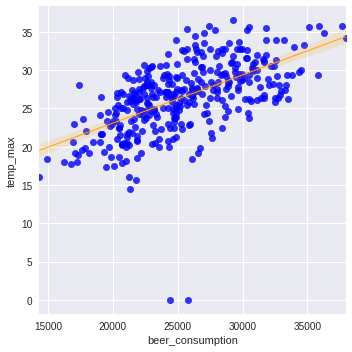

In [25]:
sns.lmplot("beer_consumption", "temp_max", cerveja,
           scatter_kws={"marker":"x","color":"blue"},
           line_kws={"linewidth":1, "color":"orange"})

In [0]:
# TRatamento d Outliers

## Ao analisarmos os dados podemos observar valores discrepantes com valor 0 vamos realizar tratamento somente destes valores.

In [27]:
(cerveja==0).any()

data                False
temp_avg             True
temp_min             True
temp_max             True
precip               True
weekend              True
beer_consumption    False
dtype: bool

In [28]:
cerveja[cerveja["temp_min"]==0]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
13,2015-01-14,25.96,0.0,34.0,1.6,0.0,31825


In [29]:
cerveja[cerveja["temp_max"]==0]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
21,2015-01-22,21.74,19.2,0.0,31.0,0.0,25795
113,2015-04-24,22.52,19.3,0.0,0.0,0.0,24388


In [30]:
cerveja[cerveja["temp_avg"]==0]

,data,temp_avg,temp_min,temp_max,precip,weekend,beer_consumption
323,2015-11-20,0.0,19.6,27.0,6.8,0.0,20332
339,2015-12-06,0.0,20.6,28.0,0.1,1.0,32780


In [0]:
cerveja["temp_avg"]=cerveja["temp_avg"].replace(0,(cerveja["temp_max"]+cerveja["temp_min"])/2)
cerveja["temp_min"]=cerveja["temp_min"].replace(0,cerveja["temp_min"].mean())
cerveja["temp_max"]=cerveja["temp_max"].replace(0,cerveja["temp_max"].mean())

In [32]:
(cerveja==0).any()

data                False
temp_avg            False
temp_min            False
temp_max            False
precip               True
weekend              True
beer_consumption    False
dtype: bool

## Modelagem

Agora vamos modelar os dados

### Separacao os dados de treinamneto  e teste

In [0]:
from sklearn.model_selection import train_test_split

variaveis=['temp_max','precip','weekend']
alvo=['beer_consumption']

x= cerveja[variaveis].values
y = cerveja[alvo].values



#seleciona a proporçao aproximada de treinamneto e teste

In [0]:
split_test_size=0.30
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=split_test_size, random_state=42)

In [35]:
print("{0:0.2f}% na base de treinamento".format((len(x_train)/len(cerveja.index))*100))


69.86% na base de treinamento


In [36]:
print("{0:0.2f}% na base de test".format((len(x_test)/len(cerveja.index))*100))

30.14% na base de test


#Realizando a Interpolação

In [37]:
from sklearn import linear_model

modelo_linear= linear_model.LinearRegression()

modelo_linear.fit(x_train,y_train.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
from sklearn.metrics import mean_squared_error,r2_score

y_pred= modelo_linear.predict(x_test)

print('R^2 score: %.2f'% r2_score(y_test,y_pred))

R^2 score: 0.74


Simulação

In [39]:
valores_dos_dados=[[35,0,0]]
# 35 graus celsius, não choveu(0), dia de semana(0)

modelo_linear.predict(valores_dos_dados)

array([29753.3647769])

In [40]:
valores_dos_dados=[[35,0,1]]
# 35 graus celsius, não choveu(0),FIM de semana(1)

modelo_linear.predict(valores_dos_dados)

array([35092.25246658])

In [41]:
valores_dos_dados=[[35,0,1]]
# 35 graus celsius, não choveu(0),FIM de semana(1)

modelo_linear.predict(valores_dos_dados)

array([35092.25246658])

Salvar o Modelo

In [42]:
from sklearn.externals import joblib

joblib.dump(modelo_linear,'sazonal.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['sazonal.pkl']

Carregando o modelo implementado

In [0]:
sazonal_homolaga= joblib.load("sazonal.pkl")

In [44]:
sazonal_homolaga.predict(valores_dos_dados)

array([35092.25246658])